In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

In [80]:
data=pd.read_csv("E:\Machine Learning\Power Consumption/dataset.csv")
data.rename(columns={"Unnamed: 0":"Date"},inplace=True)
data['Date']=pd.to_datetime(data["Date"],dayfirst=True)
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day
data.drop(["Date"],axis=1,inplace=True)
data.head(2)


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year,month,day
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3


In [81]:
long=pd.read_csv("E:\Machine Learning\Power Consumption/loc.csv")
long['Dates']=pd.to_datetime(long["Dates"],dayfirst=True)
long["year"]=long["Dates"].dt.year
long["month"]=long["Dates"].dt.month
long["day"]=long["Dates"].dt.day
long.drop(["latitude","longitude","Dates"],axis=1,inplace=True)
long.head()

,States,Regions,Usage,year,month,day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2
2,Rajasthan,NR,234.1,2019,1,2
3,Delhi,NR,85.8,2019,1,2
4,UP,NR,313.9,2019,1,2


## Maximum and Minimum Power Supply Consumed Region Wise in 2020 and 2019

In [83]:
c=dict()
for i in (long.Regions.unique()):
    a=long[(long["Regions"]==i)&(long["year"]==2020)]
    b=a.Usage.sum()
    c.update({i:b})
print("For Year 2020:",c)

d=dict()
for i in (long.Regions.unique()):
    a=long[(long["Regions"]==i)&(long["year"]==2019)]
    b=a.Usage.sum()
    d.update({i:b})
    
print("For Year 2019:",d)

For Year 2020: {'NR': 147559.8, 'WR': 155089.3, 'SR': 137883.39999999997, 'ER': 46799.4, 'NER': 6190.7}
For Year 2019: {'NR': 358694.8, 'WR': 385280.5, 'SR': 338795.20000000007, 'ER': 117915.1, 'NER': 15519.7}


In [84]:
print(f" maximum power consumed in 2020 is {c[max(c)]} by {max(c)} region\n minmum power consumed in 2020 is {c[min(c)]} by {min(c)} region  ")
print(f" maximum power consumed in 2019 is {d[max(d)]} by {max(d)} region\n minmum power consumed in 2019 is {d[min(d)]} by {min(d)} region  ")

 maximum power consumed in 2020 is 155089.3 by WR region
 minmum power consumed in 2020 is 46799.4 by ER region  
 maximum power consumed in 2019 is 385280.5 by WR region
 minmum power consumed in 2019 is 117915.1 by ER region  


In [85]:
table1=pd.DataFrame.from_dict(c,orient="index")
table2=pd.DataFrame.from_dict(d,orient="index")
table1.rename(columns={0:"total usages (2020)"},inplace=True)
table2.rename(columns={0:"total usages (2019)"},inplace=True)

In [86]:
table1.head()
table2.head()

,total usages (2019)
NR,358694.8
WR,385280.5
SR,338795.2
ER,117915.1
NER,15519.7


<Axes: xlabel='total usages (2020)'>

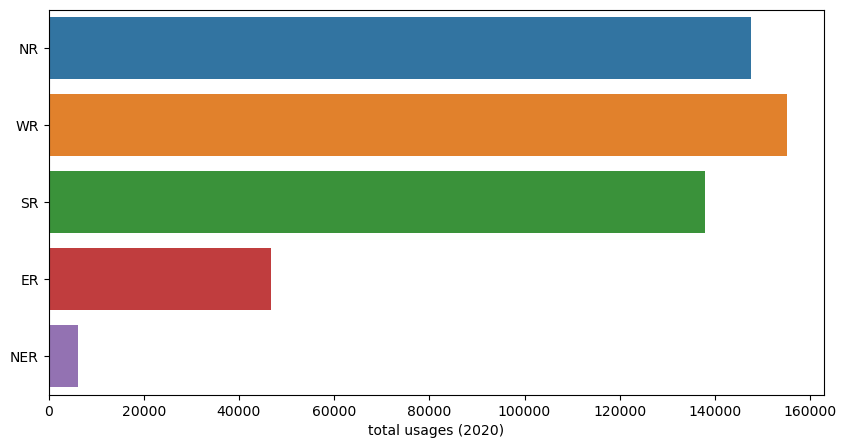

In [87]:
plt.figure(figsize=(10, 5))
sns.barplot(x="total usages (2020)",y=table1.index,data=table1)

<Axes: xlabel='total usages (2019)'>

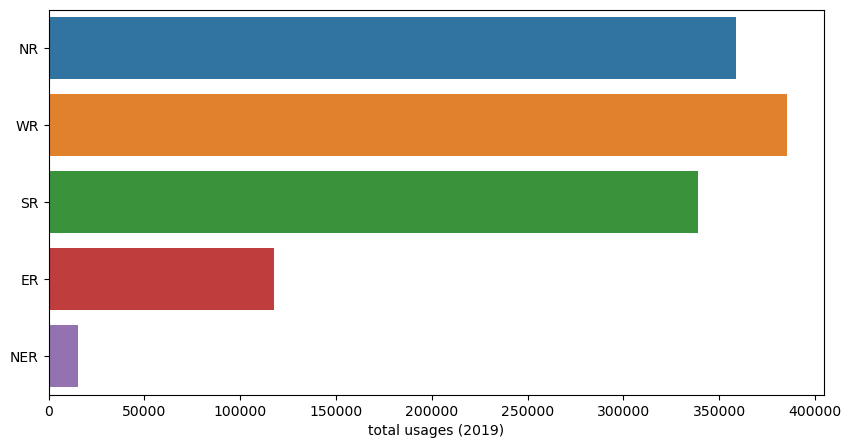

In [88]:
plt.figure(figsize=(10, 5))
sns.barplot(x="total usages (2019)",y=table2.index,data=table2)

## Top 10 States in power consumption in 2019 and 2020

In [90]:
usage2020 = long[long["year"] == 2020].groupby("States")["Usage"].sum().to_dict()
usage2019 = long[long["year"] == 2019].groupby("States")["Usage"].sum().to_dict()
table3=pd.DataFrame.from_dict(usage2020,orient="index")
table4=pd.DataFrame.from_dict(usage2019,orient="index")

In [91]:
table3.rename(columns={0:'total usage in 2020'},inplace=True)
table4.rename(columns={0:'total usage in 2019'},inplace=True)

In [92]:
table3.sort_values(by=['total usage in 2020'],ascending=False,inplace=True)
table4.sort_values(by=['total usage in 2019'],ascending=False,inplace=True)
print('Top 10 states that consume maximum power in 2020')
table3.head(10)

Top 10 states that consume maximum power in 2020


,total usage in 2020
Maharashtra,62163.1
Gujarat,47131.5
UP,45270.4
Tamil Nadu,44551.3
Rajasthan,31738.2
MP,29791.8
Karnataka,29588.8
Telangana,26615.7
Andhra Pradesh,25507.4
Punjab,21360.5


In [93]:
print('Top 10 states that consume maximum power in 2019')
table4.head(10)

Top 10 states that consume maximum power in 2019


,total usage in 2019
Maharashtra,154916.7
Gujarat,115357.4
UP,112689.9
Tamil Nadu,106720.2
Rajasthan,78138.8
MP,74974.6
Karnataka,73076.9
Telangana,67449.6
Andhra Pradesh,63097.0
West Bengal,49868.7


Top 10 states that consume maximum power in 2019


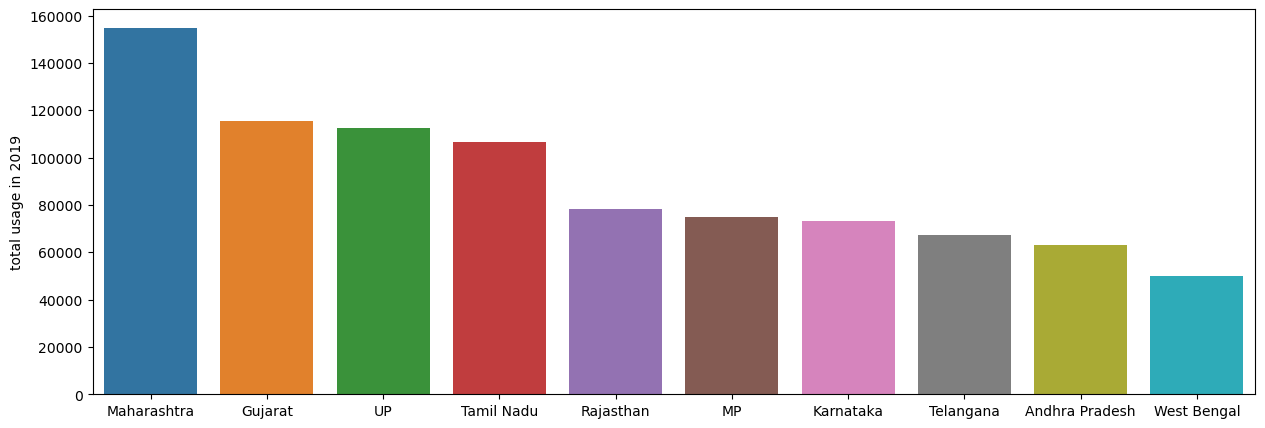

In [94]:
table5=table4.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(y="total usage in 2019",x=table5.index,data=table5)
print("Top 10 states that consume maximum power in 2019")

Top 10 states that consume maximum power in 2020


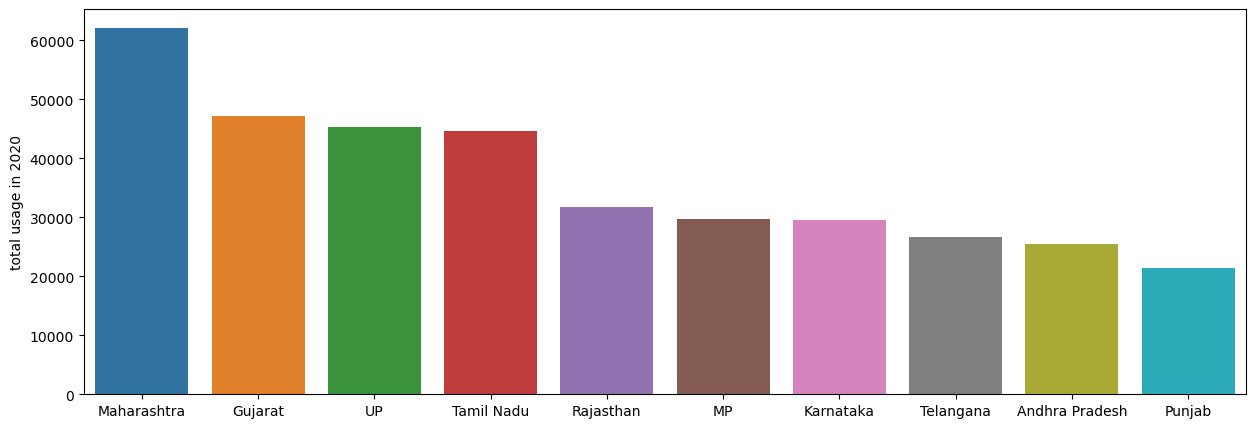

In [95]:
table6=table3.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(y="total usage in 2020",x=table6.index,data=table6)
print("Top 10 states that consume maximum power in 2020")

In [96]:
print('Top 10 states that consume least power in 2020')
table7=table3.tail(10)
table7

Top 10 states that consume least power in 2020


,total usage in 2020
Goa,1573.4
Pondy,1105.6
Meghalaya,820.7
Chandigarh,610.8
Tripura,572.5
Manipur,360.2
Nagaland,310.9
Arunachal Pradesh,306.9
Mizoram,244.0
Sikkim,182.2


In [97]:
print('Top 10 states that consume least power in 2019')
table8=table4.tail(10)
table8

Top 10 states that consume least power in 2019


,total usage in 2019
Goa,4006.5
Pondy,2653.3
Meghalaya,2018.1
Tripura,1482.5
Chandigarh,1472.4
Manipur,894.6
Nagaland,776.8
Arunachal Pradesh,754.0
Mizoram,614.3
Sikkim,466.4


Top 10 states that consume least power in 2019


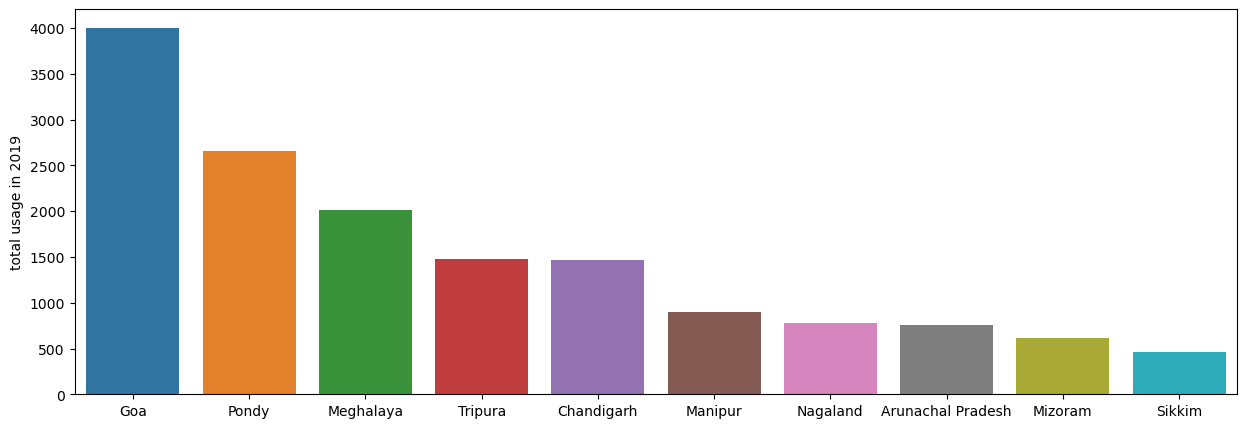

In [121]:
plt.figure(figsize=(15, 5))
sns.barplot(y="total usage in 2019",x=table8.index,data=table8)
print("Top 10 states that consume least power in 2019")


Top 10 states that consume least power in 2020


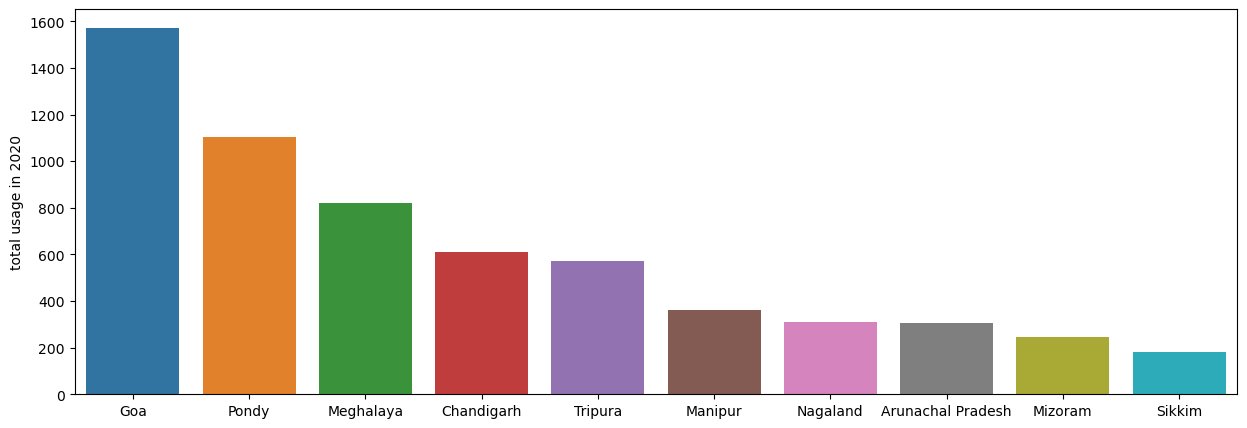

In [119]:
plt.figure(figsize=(15, 5))
sns.barplot(y="total usage in 2020",x=table7.index,data=table7)
print("Top 10 states that consume least power in 2020")

## Peak Months

In [134]:
dict2019 = long[long["year"] == 2019].groupby("month")["Usage"].sum().to_dict()
dict2020 = long[long["year"] == 2020].groupby("month")["Usage"].sum().to_dict()
#month=["jan","feb",'march',"april","may","june","july","aug","sep","oct","nov","dec"]

In [136]:
max2019 = max(dict2019, key=dict2019.get)  # Month with max usage in 2019
max2020 = max(dict2020, key=dict2020.get)  # Month with max usage in 2020
print(f"maximum rise in consumption is in month of {max2019} 2019")
print(f"maximum rise in consumption is in month of {max2020} 2020")

maximum rise in consumption is in month of 7 2019
maximum rise in consumption is in month of 1 2020


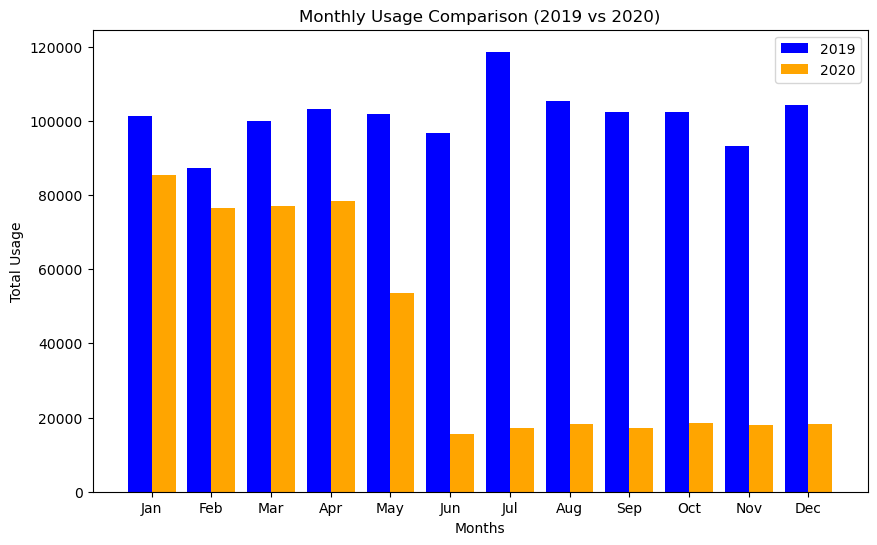

In [148]:
import calendar
month_names = [calendar.month_abbr[m] for m in dict2019.keys()]
months = list(dict2019.keys())  # [1, 2, ..., 12]
usage_2019 = list(dict2019.values())
usage_2020 = list(dict2020.values())

bar_width = 0.4
x_indexes = np.arange(len(months))

plt.figure(figsize=(10, 6))
plt.bar(x_indexes - bar_width / 2, usage_2019, width=bar_width, label="2019", color="blue")
plt.bar(x_indexes + bar_width / 2, usage_2020, width=bar_width, label="2020", color="orange")

plt.xlabel("Months")
plt.ylabel("Total Usage")
plt.title("Monthly Usage Comparison (2019 vs 2020)")
plt.xticks(ticks=x_indexes, labels=month_names)
plt.legend()

plt.show()


## Lockdown vs Normal 

In [159]:
list1=list(dict2019.values())
list2=list(dict2020.values())
print(f"total consumption in march-may 2019 during Lockdown is {list1[2]+list1[3]+list1[4]}  ")
print(f"total consumption in march-may 2020 is {list2[2]+list2[3]+list2[4]}  ")

total consumption in march-may 2019 during Lockdown is 304712.4  
total consumption in march-may 2020 is 208813.7  


In [155]:
diff=((list1[2]+list1[3]+list1[4])-(list2[2]+list2[3]+list2[4]))
print(f"Difference between consumption during lockdown and without lockdown is {diff}  ")

Difference between consumption during lockdown and without lockdown is 95898.70000000001  


In [163]:
num1=float((list1[2]+list1[3]+list1[4]))
num2=float((list2[2]+list2[3]+list2[4]))
list3=[]
list4=[]
list4.append(num1)  
list4.append(num2)  

list3.append('before lockdown')  
list3.append('during lockdown')

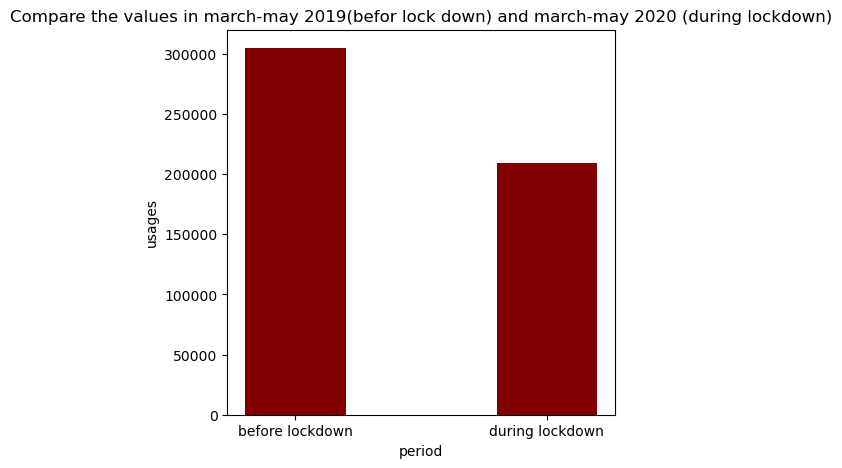

In [165]:
plt.figure(figsize = (5, 5))
plt.bar(list3, list4, color ='maroon',
        width = 0.4)
 
plt.xlabel("period")
plt.ylabel("usages")
plt.title("Compare the values in march-may 2019(befor lock down) and march-may 2020 (during lockdown)")
plt.show()

In [167]:
print("State-wise Consumption in 2019 and 2020:\n")
print(f"{'State':<20}{'2019 Usage':<15}{'2020 Usage':<15}")

for state in usage2019.keys():
    usage_2019 = usage2019.get(state, 0)  # Get usage for 2019, default to 0 if missing
    usage_2020 = usage2020.get(state, 0)  # Get usage for 2020, default to 0 if missing
    print(f"{state:<20}{usage_2019:<15}{usage_2020:<15}")


State-wise Consumption in 2019 and 2020:

State               2019 Usage     2020 Usage     
Andhra Pradesh      63097.0        25507.4        
Arunachal Pradesh   754.0          306.9          
Assam               8979.4         3575.5         
Bihar               30007.9        11821.3        
Chandigarh          1472.4         610.8          
Chhattisgarh        30179.9        12010.3        
DNH                 5845.4         2419.2         
Delhi               29458.3        12482.2        
Goa                 4006.5         1573.4         
Gujarat             115357.4       47131.5        
HP                  9490.8         3873.0         
Haryana             48995.0        20586.8        
J&K                 15915.3        6349.5         
Jharkhand           8605.5         3387.3         
Karnataka           73076.9        29588.8        
Kerala              25798.2        10514.6        
MP                  74974.6        29791.8        
Maharashtra         154916.7       62163